<a href="https://colab.research.google.com/github/Rendy3001/titanic/blob/master/Assgn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: My Heart Will Go On (but not yours?!?)

Today's assignment was inspired by a student's question, wondering if network analysis could be applied to the Titanic dataset. Instead of using the somewhat tragic dataset about surviving or perishing in the Titanic disaster, we will focus on the events leading up to it and try to solve the mystery behind why Rose didn't help Jack from dying.

<img title='Titanic' style="float: right;" src='https://www.firstforwomen.com/wp-content/uploads/sites/2/2024/09/kate-winslet-titanic.jpg?w=953&quality=86&strip=all' width="700">

We will use **James Cameron’s** 1997 film [Titanic](https://www.imdb.com/title/tt0120338/), starring Leonardo DiCaprio (as Jack) and Kate Winslet (as Rose). The film is based on a partly true story, though with a few inaccuracies.

One example is [Violet Jessop](https://www.youtube.com/watch?v=ERDHDAR3ZsU&ab_channel=titanicstories), a woman who survived the RMS Olympic (1911), RMS Titanic (1912), and later the HMHS Britannic (1916), which sank after hitting a German naval mine. In the film, she was depicted as an elderly Third-Class stewardess, instead of a First-Class stewardess who was about 24 years old.


### Dataset
Dataset consists of two files: **edges.csv** & **nodes.csv**. The names of the file should be selfexpenatory. Data was constructed from film's script, published [here](https://imsdb.com/scripts/Titanic.html), and present the coocurence of the characters in each scene. Both files are in the github repository of the assigment.  

In **edges.csv** the Weight column presents the number of coocurences for characters, and should be used in the assigment.

## Instructions:

Follow all 4 objectives. For each objective, calculate and/or visualize the results, and provide explanations of **WHAT** you used to accomplish the task, **WHY** you chose that approach, and most importantly, your **understanding of the results**. **LET'S HYPOTHESIZE** that Rose could have saved Jack, so at the end, provide your reasoning as to why she didn't save him (there’s no right answer to this :)).

You can simply rename this file and submit it. If you'd like, you can also create a video presentation. Making a video is a great exercise for students who are struggling with oral exams.

Over the weekend, I will review the submissions, and at the beginning of next week, I will schedule a Teams meeting where we will slowly go through the objectives together.

HINT: Use Networx documentation!



## Objectives:
The primary objective is to construct a visual representation of a graph, representing the relationships and interactions among the characters in the Titanic dataset.

### 1. Graph Construction

In [1]:
#Importing necessary libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
#Reading edges and nodes files
edges = pd.read_csv('https://raw.githubusercontent.com/saoter/Ti_ta_nic/main/edges.csv')
nodes = pd.read_csv('https://raw.githubusercontent.com/saoter/Ti_ta_nic/main/nodes.csv')

In [ ]:
edges.head()

,Source,Target,Type,Id,Label,Weight,movie_id
0,5096932,5096969,Undirected,679,181587,1,828
1,5098606,5103789,Undirected,680,182039,1,828
2,5098606,5098095,Undirected,681,182094,1,828
3,5098606,5101061,Undirected,682,182036,1,828
4,5098606,5097941,Undirected,683,182037,1,828


In [ ]:
nodes.head()

,Id,Label,Gender,movie_id,componentnumber,modularity_class
0,5097316,ROSE,F,828,0,0
1,5098095,JACK,M,828,0,3
2,5097875,CAL,M,828,0,5
3,5098619,MOLLY,F,828,0,4
4,5098545,SMITH,M,828,0,2


In [ ]:
nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                70 non-null     int64 
 1   Label             70 non-null     object
 2   Gender            70 non-null     object
 3   movie_id          70 non-null     int64 
 4   componentnumber   70 non-null     int64 
 5   modularity_class  70 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 3.4+ KB


In [3]:
#Constructing a graph
g = nx.Graph()

In [4]:
#Adding weighted edges
g.add_weighted_edges_from(zip(edges['Source'], edges['Target'], edges['Weight']))

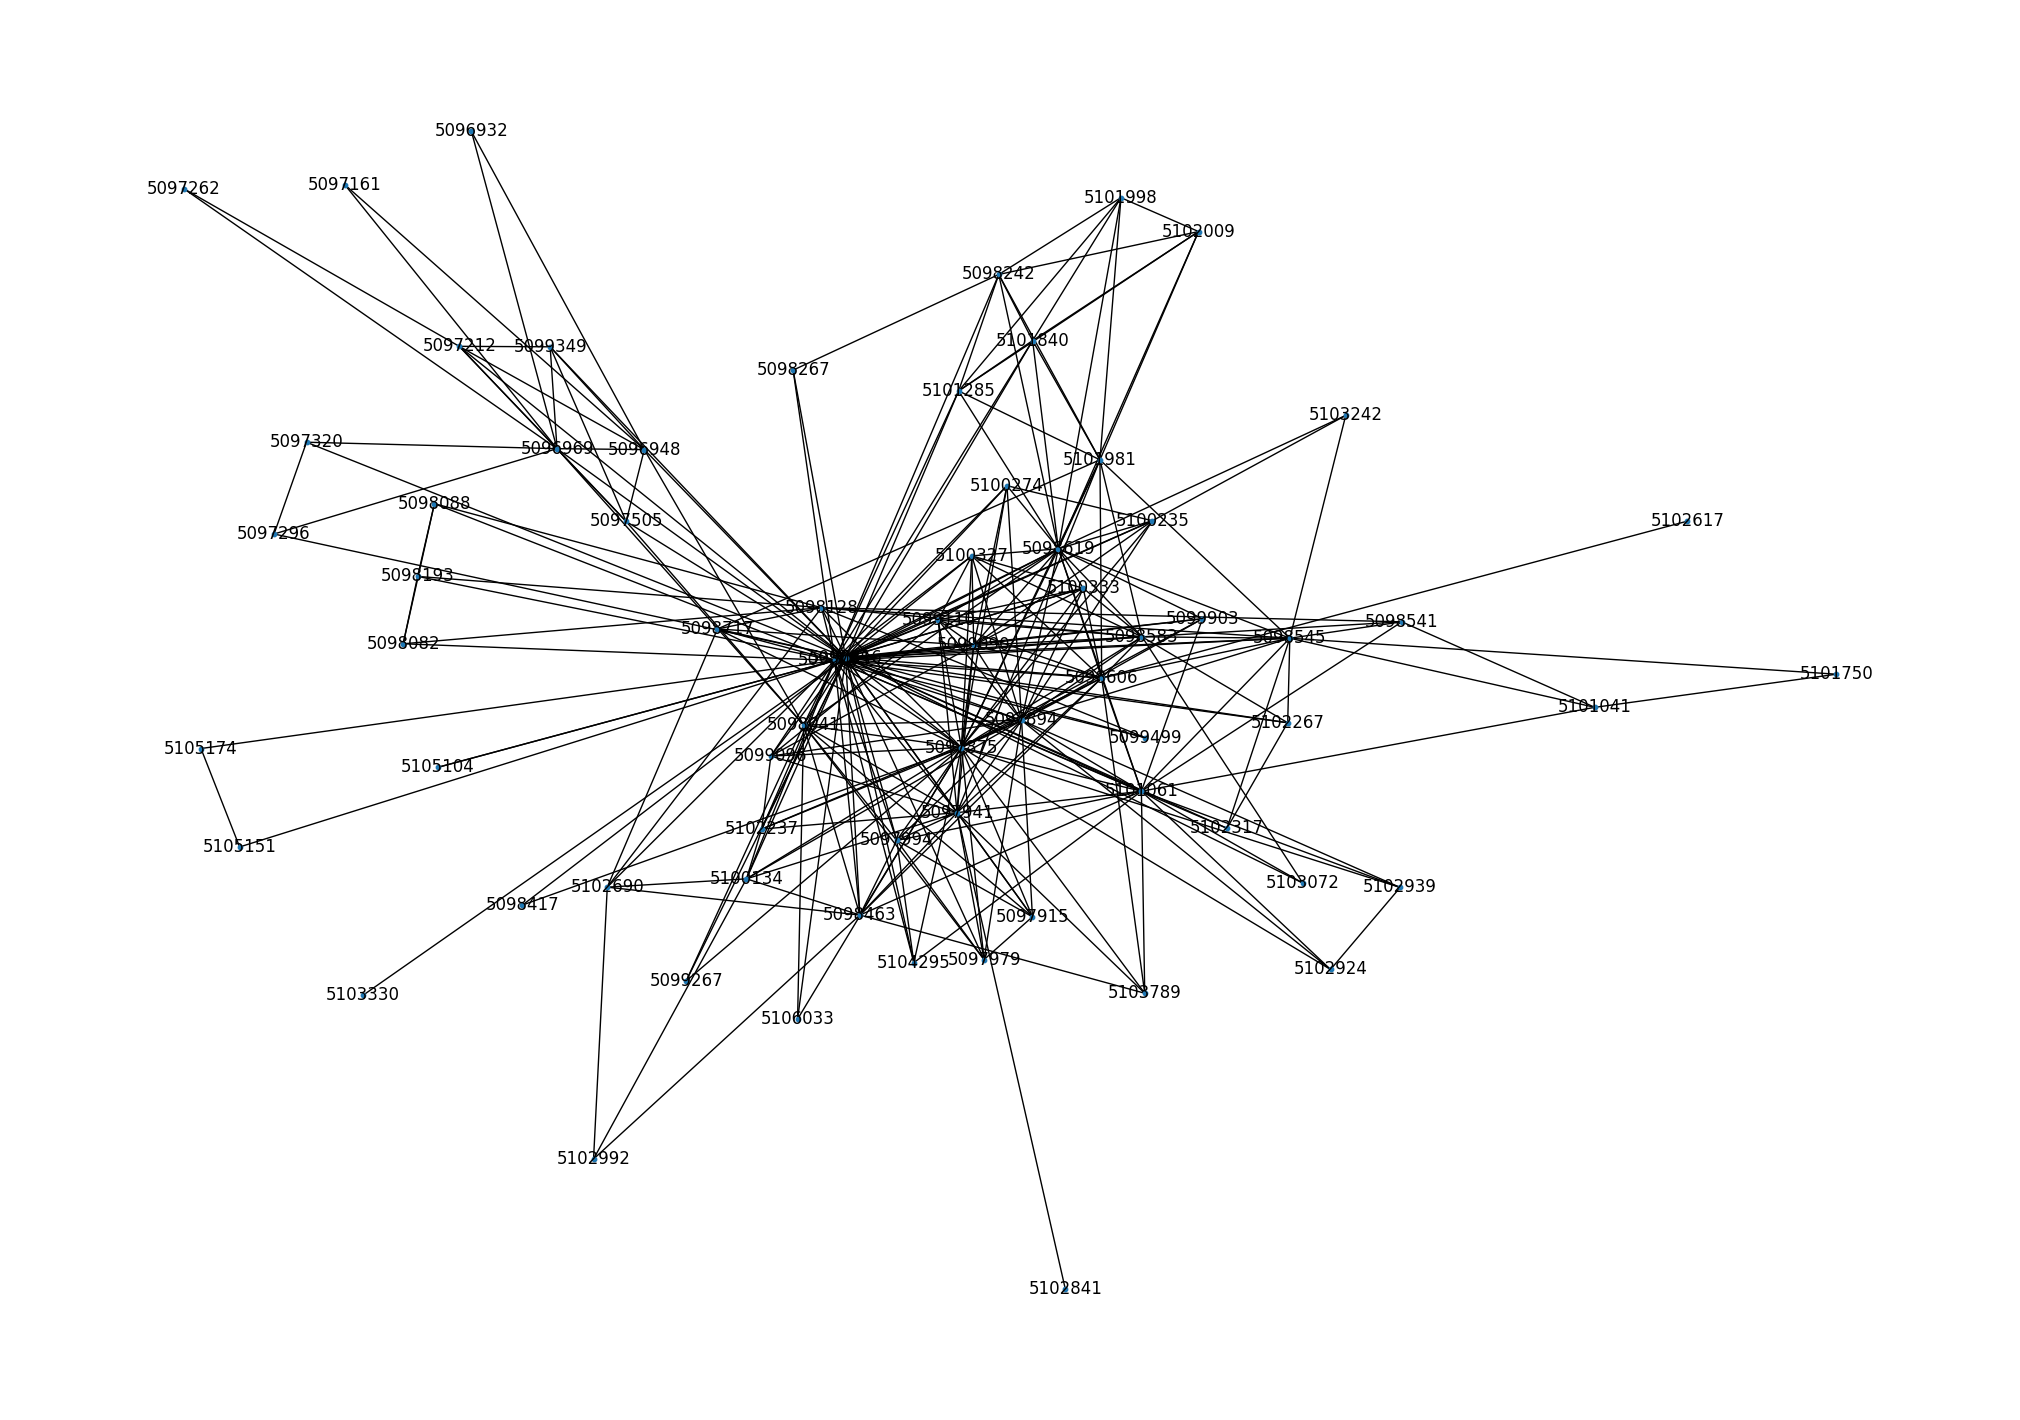

In [5]:
#Plotting the graph
plt.figure(figsize=(20, 14))
nx.draw(g, with_labels = True, node_size=10)

### 2. Graph Analysis
Determinate the basic graph indicators:
**Total number of nodes and edges**: to understand the *scale and complexity* of the graph
**Average degree**: giving an average of *connections per node*
**Graph density**:  providing an insight into the *overall connectivity*

In [ ]:
#Counting total nodes and edges and calculating density and average degree
total_nodes = g.number_of_nodes()
total_edges = g.number_of_edges()
density = nx.density(g)
avg_degree = 2*total_edges/total_nodes
print(f'Total number of nodes: {total_nodes}')
print(f'Total number of edges: {total_edges}')
print(f'Graph density: {density}')
print(f'Average degree: {avg_degree}')


Total number of nodes: 70
Total number of edges: 299
Graph density: 0.12380952380952381
Average degree: 8.542857142857143


### 3. Node analysis
Calculate basic centralities and compare the most central characters.

In [ ]:
nodes.head()

,Id,Label,Gender,movie_id,componentnumber,modularity_class
0,5097316,ROSE,F,828,0,0
1,5098095,JACK,M,828,0,3
2,5097875,CAL,M,828,0,5
3,5098619,MOLLY,F,828,0,4
4,5098545,SMITH,M,828,0,2


In [ ]:
edges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Source    299 non-null    int64 
 1   Target    299 non-null    int64 
 2   Type      299 non-null    object
 3   Id        299 non-null    int64 
 4   Label     299 non-null    int64 
 5   Weight    299 non-null    int64 
 6   movie_id  299 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 16.5+ KB


In [7]:
#Calculating degree of centrality
cent_degree = dict(nx.degree(g))
sorted(cent_degree.items(),key=lambda x:-x[1])[:10]

[(5097316, 46),
 (5098095, 39),
 (5097875, 33),
 (5097894, 25),
 (5098619, 23),
 (5097941, 19),
 (5101061, 18),
 (5098606, 17),
 (5098583, 16),
 (5098545, 15)]

In [ ]:
##Calculating eigen vector centrality
cent_eigen = dict(nx.eigenvector_centrality(g))
sorted(cent_eigen.items(),key=lambda x:-x[1])[:10]

[(5097316, 0.3408775978280382),
 (5098095, 0.3154522435214432),
 (5097875, 0.30375383619433416),
 (5097894, 0.26693895491248204),
 (5098619, 0.2326201357190866),
 (5098606, 0.2079830961333803),
 (5097941, 0.2062458712851681),
 (5099090, 0.19572889083877928),
 (5098583, 0.18689624473401995),
 (5101061, 0.18098774128999118)]

In [ ]:
#Calculating in between centrality
cent_between = nx.betweenness_centrality(g)
sorted(cent_between.items(),key=lambda x:-x[1])[:10]

[(5097316, 0.039050491501110535),
 (5098095, 0.02227894176482872),
 (5097875, 0.009123864507278555),
 (5098619, 0.005824122897209686),
 (5098545, 0.005783855301782443),
 (5101061, 0.00491163943600586),
 (5096969, 0.004892462460382475),
 (5097941, 0.004409301422406633),
 (5098606, 0.0038914901037228446),
 (5097894, 0.0037875786814165393)]

### 4. Node attributes
Add Gender attribute (from dataset to the network) and calculate and/or visualize the share of females and males characters in the film. Furthermore, subgraph network to only male characters. Who are the main characters, what is their relationship?



In [ ]:
#Separating nodes into Males and Females and creating subgraph
male_nodes = nodes[nodes.Gender == 'M']['Label']
female_nodes = nodes[nodes.Gender == 'F']['Label']

g_sub = g.subgraph(male_nodes)


In [ ]:
#Calculating proportion of Male and Female characters
total_characters = male_nodes.value_counts().sum() + female_nodes.value_counts().sum()

male_percentage = (male_nodes.value_counts().sum() / total_characters) * 100
female_percentage = (female_nodes.value_counts().sum() / total_characters) * 100

print(f"Percentage of male characters: {male_percentage:.2f}%")
print(f"Percentage of female characters: {female_percentage:.2f}%")

Percentage of male characters: 77.14%
Percentage of female characters: 22.86%


In [ ]:
#Adding edges to the male subgraph
male_edges = [
    (src, tgt, weight)
    for src, tgt, weight in zip(edges['Source'], edges['Target'], edges['Weight'])
    if src in male_nodes and tgt in male_nodes
]
g.add_weighted_edges_from(male_edges)

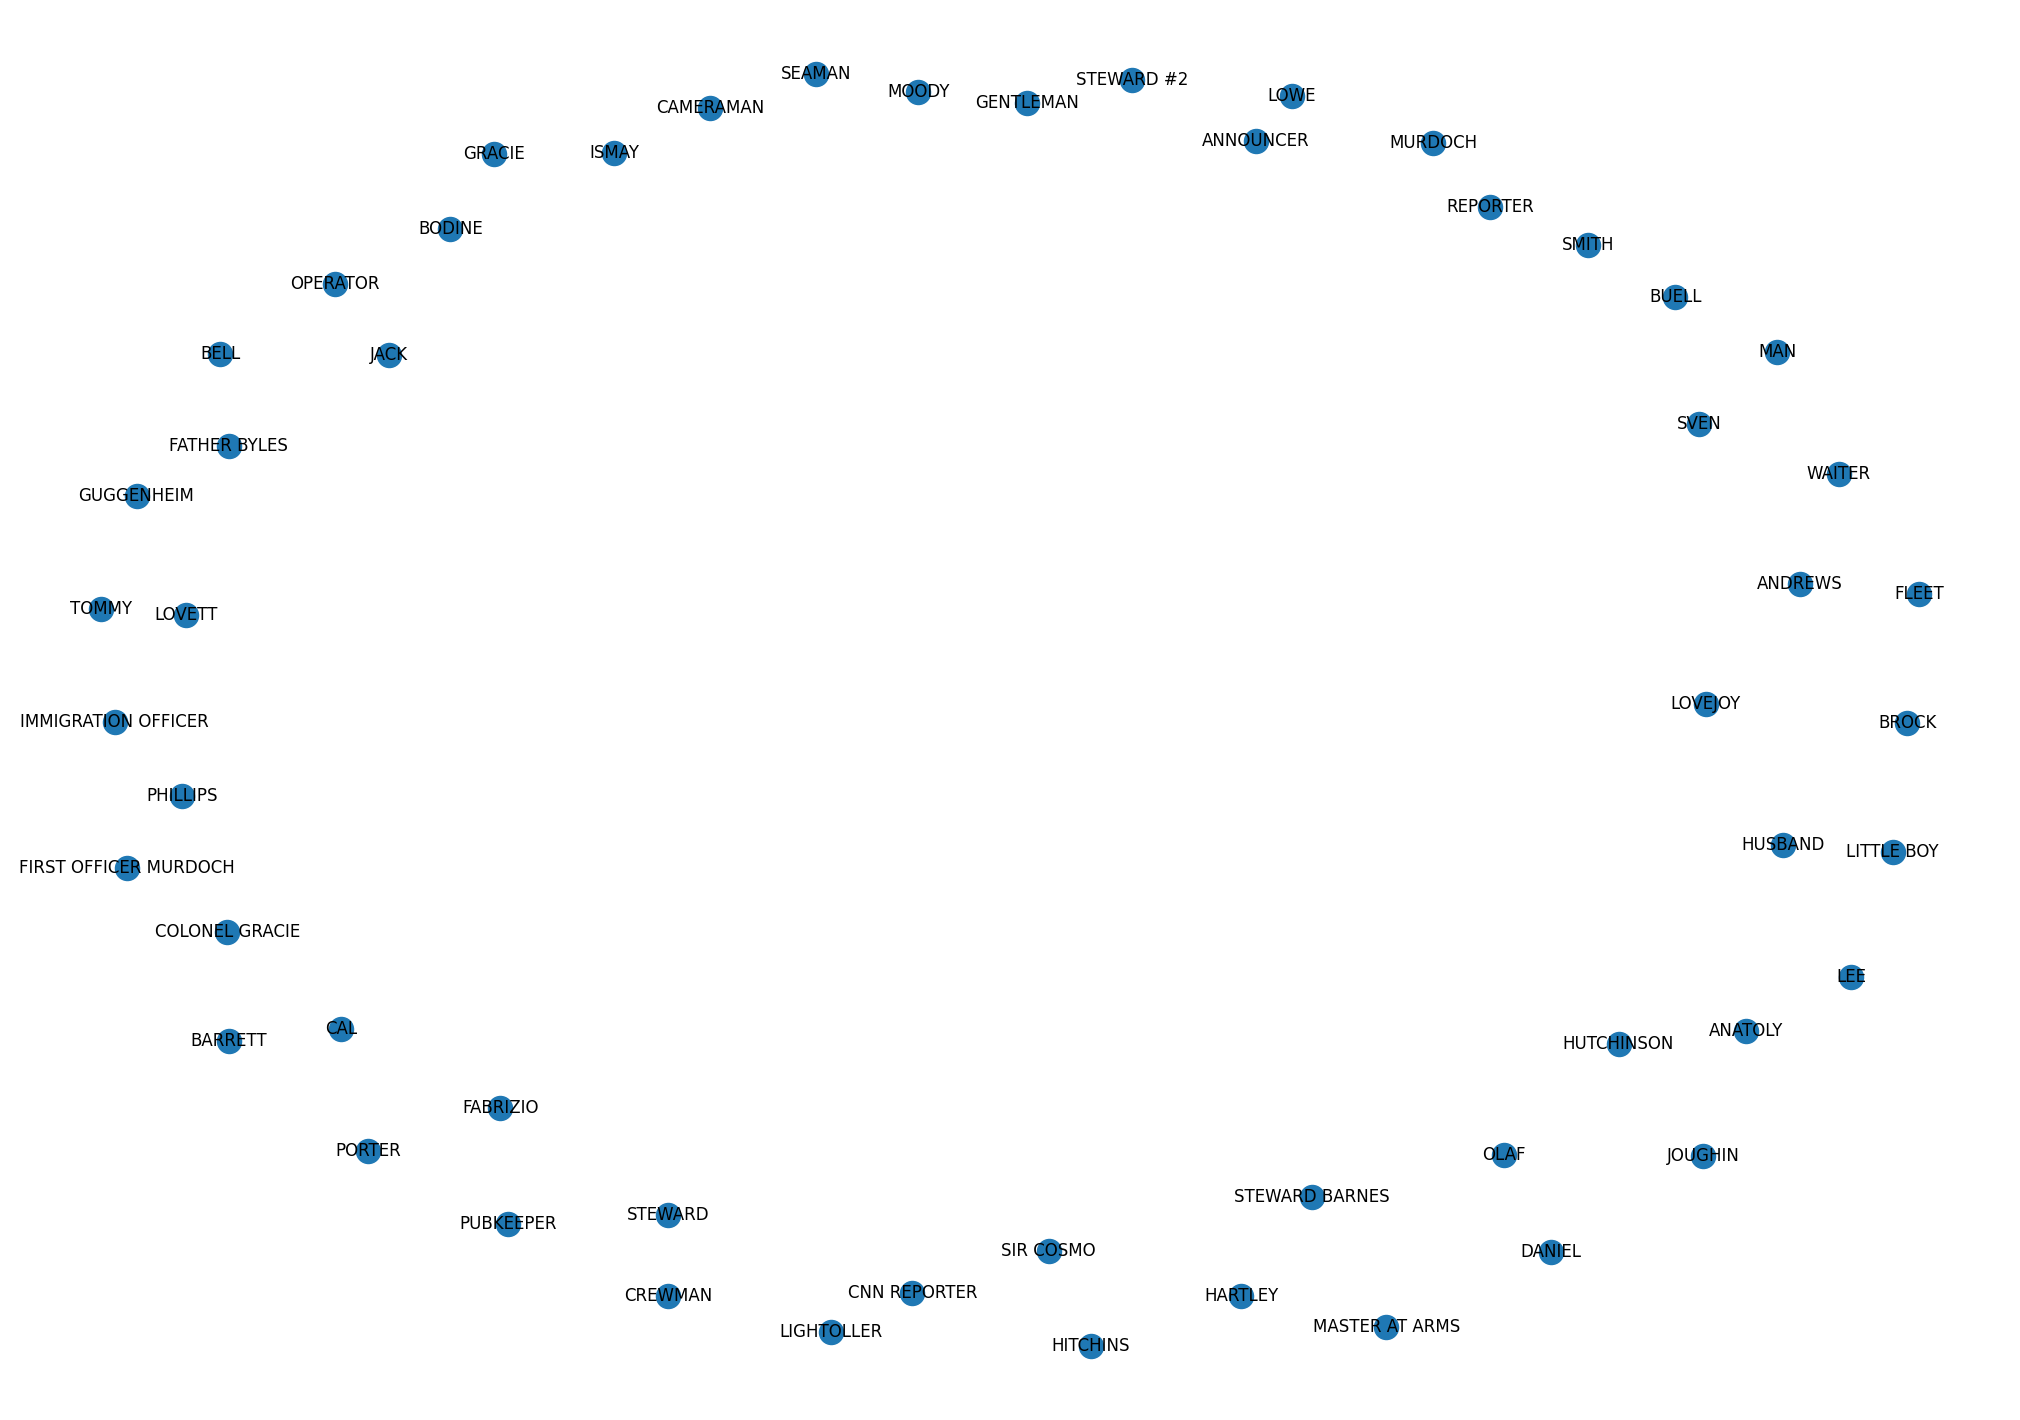

In [ ]:
#Plotting male subgraph
plt.figure(figsize=(20, 14))
pos = nx.spring_layout(g_sub)
nx.draw(g_sub, pos, with_labels=True)
nx.draw_networkx_edge_labels(g_sub, pos, edge_labels=nx.get_edge_attributes(g_sub, 'weight'))
plt.show()

## FINAL ANSWER AND ARGUMENTATION

The main character is Rose as she has the most edges and greatest centrality values. Rose have not saved Jack because he did not want to risk both of them dying.

